# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

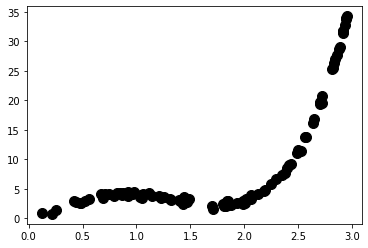

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 5.67047232e+00,  2.36095331e+00,  3.09047753e+00, -2.46948360e-01,
        1.60312073e+01,  2.08151837e+01,  1.50770306e+01,  2.45500385e+01,
       -1.12745038e-01, -3.30726800e-01,  5.74387641e-01, -2.73534431e-01,
        2.64863728e+01, -4.26537868e-02,  2.86976730e+00,  5.67562126e+00,
       -4.95233582e-01, -1.46406774e-01,  9.16206995e+00,  6.33976223e+00,
        6.31523629e-01,  2.87456540e+00,  2.74369111e+01,  6.27345024e+00,
        2.09315995e+01, -3.08104487e-01,  8.14053930e-02,  1.71959880e+01,
        2.08444203e-03,  2.49530058e+01,  1.90728296e+01, -2.81859886e-01,
        8.01630401e-01, -4.82367577e-01, -5.77364843e-01,  3.62999948e+00,
        3.19984005e+00,  1.34028268e+01,  1.53582625e+01,  2.85507327e+01])

In [6]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.7774048028876313
Explained variance score: 0.7774048028876313
Median absolute error: 2.5432119025878515
Mean squared error: 13.586608823566143
Mean absolute errors: 2.999469514233545


# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25